### Import necessary libraries


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


### Load dataset

In [90]:
laptop_data = pd.read_csv('/content/laptop_prices.csv')

In [91]:
laptop_data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [92]:
laptop_data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1263.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.025970,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.428266,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [93]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1263 non-null   object 
 3   Inches                1263 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           686 non-null    object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

### Data Cleaning and Preparation
### Check for missing values

In [94]:
print("Missing values in each column:\n", laptop_data.isnull().sum())

Missing values in each column:
 Company                   0
Product                   0
TypeName                 12
Inches                   12
Ram                       0
OS                        0
Weight                    0
Price_euros               0
Screen                    0
ScreenW                   0
ScreenH                   0
Touchscreen             589
IPSpanel                  0
RetinaDisplay             0
CPU_company               0
CPU_freq                  0
CPU_model                 5
PrimaryStorage            0
SecondaryStorage          0
PrimaryStorageType        0
SecondaryStorageType      0
GPU_company               0
GPU_model                 0
dtype: int64


In [37]:
# Drop rows with missing values for simplicity
laptop_data = laptop_data.dropna()

In [38]:
# Ensure 'Ram', 'PrimaryStorage', and 'SecondaryStorage' columns are strings, then convert to numeric
laptop_data['Ram'] = laptop_data['Ram'].astype(str).str.replace('GB', '').astype(int)
laptop_data['PrimaryStorage'] = laptop_data['PrimaryStorage'].astype(str).str.replace('GB', '').astype(int)
laptop_data['SecondaryStorage'] = laptop_data['SecondaryStorage'].fillna('0GB').astype(str).str.replace('GB', '').astype(int)


### a. Identify top 5 laptop brands by number of products listed

In [9]:
top_5_brands = laptop_data['Company'].value_counts().head(5)
print("Top 5 brands by product count:")
print(top_5_brands)

Top 5 brands by product count:
Company
Dell      291
Lenovo    289
HP        268
Asus      152
Acer      101
Name: count, dtype: int64


### b. Find the average price of laptops for each brand and identify the highest and lowest average price

In [10]:
avg_price_per_brand = laptop_data.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
highest_avg_price_brand = avg_price_per_brand.idxmax()
lowest_avg_price_brand = avg_price_per_brand.idxmin()

print("\nAverage price of laptops by brand:")
print(avg_price_per_brand)
print(f"\nHighest average price brand: {highest_avg_price_brand}")
print(f"Lowest average price brand: {lowest_avg_price_brand}")


Average price of laptops by brand:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64

Highest average price brand: Razer
Lowest average price brand: Vero


### c. Present the correlation between Price_euros and other numeric features (CPU_freq, Ram, Inches, Weight)

In [11]:
numeric_features = ['Price_euros', 'CPU_freq', 'Ram', 'Inches', 'Weight']
correlation_matrix = laptop_data[numeric_features].corr()
price_correlations = correlation_matrix['Price_euros'].sort_values(ascending=False)

print("\nCorrelation with Price_euros:")
print(price_correlations)



Correlation with Price_euros:
Price_euros    1.000000
Ram            0.740287
CPU_freq       0.428847
Weight         0.211883
Inches         0.070091
Name: Price_euros, dtype: float64


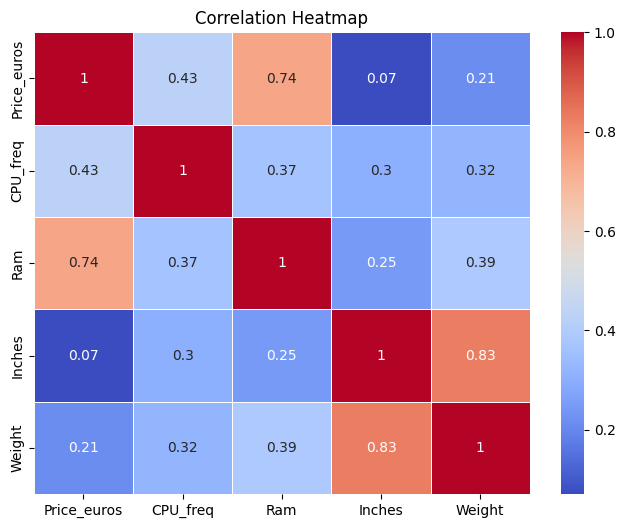

In [12]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### d. Create a new feature, StorageTotal, by summing PrimaryStorage and SecondaryStorage

In [16]:
laptop_data['StorageTotal'] = laptop_data['PrimaryStorage'] + laptop_data['SecondaryStorage']
print("\nNew feature StorageTotal created:")
print(laptop_data[['PrimaryStorage', 'SecondaryStorage', 'StorageTotal']].head())


New feature StorageTotal created:
   PrimaryStorage  SecondaryStorage  StorageTotal
0             128                 0           128
1             128                 0           128
2             256                 0           256
3             512                 0           512
4             256                 0           256


### e. Build a regression model to predict Price_euros
#### Prepare the data for the regression model
#### Encode GPU_company (categorical) into numerical values

In [47]:
le = LabelEncoder()
laptop_data['GPU_company_encoded'] = le.fit_transform(laptop_data['GPU_company'])

In [48]:
# Prepare the data for regression
X_reg = laptop_data[['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage', 'GPU_company_encoded']]
y_reg = laptop_data['Price_euros']

In [49]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [53]:
# Train and Evaluate a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)


LinearRegression()

In [54]:
# Predict on both training and testing sets
y_train_pred_lr = lr_model.predict(X_train_reg)
y_test_pred_lr = lr_model.predict(X_test_reg)


In [56]:
# Calculate R2 scores
train_r2_lr = r2_score(y_train_reg, y_train_pred_lr)
test_r2_lr = r2_score(y_test_reg, y_test_pred_lr)


# Print R2 scores
print("Train R² Score (Linear Regression):", train_r2_lr)
print("Test R² Score (Linear Regression):", test_r2_lr)

Train R² Score (Linear Regression): 0.5628180584375764
Test R² Score (Linear Regression): 0.6788073809561291


In [57]:
# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test_reg, y_test_pred_lr)
r2_lr = r2_score(y_test_reg, y_test_pred_lr)

print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R²): {r2_lr}")


Linear Regression Model Performance:
Mean Squared Error (MSE): 120135.910155376
R-squared (R²): 0.6788073809561291


In [60]:
# Train and Evaluate a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [61]:
y_pred_rf = rf_model.predict(X_test_reg)

In [62]:
# Evaluate the Random Forest Regressor
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R²): {r2_rf}")


Random Forest Regressor Performance:
Mean Squared Error (MSE): 88123.27588981883
R-squared (R²): 0.7643956270429945


In [63]:
# Suggest the best regression model based on R²
if r2_rf > r2_lr:
    print("\nThe Random Forest Regressor is the better model for predicting laptop prices.")
else:
    print("\nThe Linear Regression model is the better model for predicting laptop prices.")


The Random Forest Regressor is the better model for predicting laptop prices.


### f. Create a classification model to predict the laptop type (TypeName) based on features such as Inches, Ram, PrimaryStorage, and Weight.

#### Prepare the data for classification

In [64]:
X_class = laptop_data[['Inches', 'Ram', 'PrimaryStorage', 'Weight']]
y_class = laptop_data['TypeName']

In [65]:
# Encode the target variable 'TypeName'
y_class_encoded = le.fit_transform(y_class)

In [66]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

In [67]:
# Train and Evaluate a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [69]:
# Predict and evaluate classifier
y_pred_class_rf = rf_classifier.predict(X_test_class)

In [70]:
# Evaluate the Random Forest Classifier
accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
confusion_rf = confusion_matrix(y_test_class, y_pred_class_rf)
classification_report_rf = classification_report(y_test_class, y_pred_class_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
print("\nRandom Forest Classifier Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", confusion_rf)
print("\nClassification Report:\n", classification_report_rf)


Random Forest Classifier Accuracy: 0.7407407407407407

Confusion Matrix:
 [[ 3  1  1  6  5  0]
 [ 0 15  0  1  0  1]
 [ 0  0  0  0  1  0]
 [ 1  6  0 71  2  0]
 [ 2  1  0  7 11  0]
 [ 0  0  0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.19      0.27        16
           1       0.65      0.88      0.75        17
           2       0.00      0.00      0.00         1
           3       0.84      0.89      0.86        80
           4       0.58      0.52      0.55        21
           5       0.00      0.00      0.00         0

    accuracy                           0.74       135
   macro avg       0.43      0.41      0.41       135
weighted avg       0.73      0.74      0.72       135



In [72]:
# Feature Importance for the Random Forest Classifier
feature_importances_rf = rf_classifier.feature_importances_
feature_names = X_class.columns

print("\nFeature Importances in Random Forest Classifier:")
for feature, importance in zip(feature_names, feature_importances_rf):
    print(f"{feature}: {importance:.4f}")



Feature Importances in Random Forest Classifier:
Inches: 0.1782
Ram: 0.1828
PrimaryStorage: 0.1045
Weight: 0.5344


In [73]:
# Train and Evaluate a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=42)

In [74]:
y_pred_class_dt = dt_classifier.predict(X_test_class)

In [78]:
# Evaluate the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test_class, y_pred_class_dt)
confusion_dt = confusion_matrix(y_test_class, y_pred_class_dt)
classification_report_dt = classification_report(y_test_class, y_pred_class_dt)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
print("\nDecision Tree Classifier Accuracy:", accuracy_dt)
print("\nConfusion Matrix",confusion_dt)
print("\nClassification Report:\n", classification_report_dt)


Decision Tree Classifier Accuracy: 0.7555555555555555

Confusion Matrix [[ 5  0  1  5  5  0]
 [ 1 15  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 1  4  0 72  2  1]
 [ 4  1  0  6 10  0]
 [ 0  0  0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.75      0.88      0.81        17
           2       0.00      0.00      0.00         1
           3       0.86      0.90      0.88        80
           4       0.56      0.48      0.51        21
           5       0.00      0.00      0.00         0

    accuracy                           0.76       135
   macro avg       0.44      0.43      0.43       135
weighted avg       0.74      0.76      0.75       135



In [82]:
# Feature Importance for the Decision Tree Classifier
feature_importances_dt = dt_classifier.feature_importances_

print("\nFeature Importances in Decision Tree Classifier:")
for feature, importance in zip(feature_names, feature_importances_dt):
    print(f"{feature}: {importance:.4f}")


Feature Importances in Decision Tree Classifier:
Inches: 0.1098
Ram: 0.1629
PrimaryStorage: 0.0926
Weight: 0.6347


In [85]:
# Suggest the best classification model based on accuracy
if accuracy_rf > accuracy_dt:
    print("\nThe Random Forest Classifier is the better model for predicting laptop types.")
else:
    print("\nThe Decision Tree Classifier is the better model for predicting laptop types.")


The Decision Tree Classifier is the better model for predicting laptop types.
